# Example_notebook

In [1]:
include("../src/fdfd_local_field.jl")
using PyPlot

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1186
┌ Warning: Module Conda with build ID 232807014756252 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: Module Conda with build ID 232807014756252 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1186
┌ Warning: Module Conda with build ID 232807014756252 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947


### reference simulation

In [2]:
refractive_indexes = ones(3) * 1.45
ps = [0.75, 0.5, 0.66, 0.33, 0.66, 0.5, 0.75, 0.5, 0.66, 0.33]
x, y, Ez, dpml, dsource, resolution = simulation_hole_layers_unit_cell(ps, refractive_indexes=refractive_indexes, frequency=0.25)

(0.025:0.025:0.95, -1.975:0.025:19.0, Complex{Float64}[2.74471e-8+6.52676e-10im 2.74471e-8+6.52676e-10im … 2.74471e-8+6.52676e-10im 2.74471e-8+6.52676e-10im; 6.4271e-8-4.31568e-10im 6.4271e-8-4.31568e-10im … 6.4271e-8-4.31568e-10im 6.4271e-8-4.31568e-10im; … ; -3.22823e-8-1.5094e-8im -3.22823e-8-1.5094e-8im … -3.22823e-8-1.5094e-8im -3.22823e-8-1.5094e-8im; -1.34721e-8-6.81485e-9im -1.34721e-8-6.81485e-9im … -1.34721e-8-6.81485e-9im -1.34721e-8-6.81485e-9im], 2, 1, 40)

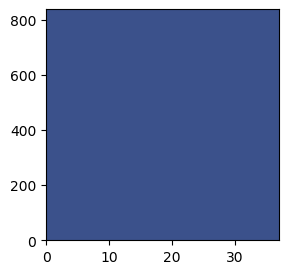

PyObject <matplotlib.contour.QuadContourSet object at 0x14324d7d0>

In [3]:
figure(figsize=(3,3))
contourf(real.(ϵ_hole_layers(x, y, ps, refractive_indexes=refractive_indexes)))

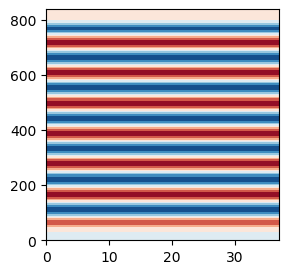

PyObject <matplotlib.contour.QuadContourSet object at 0x1439f0850>

In [4]:
figure(figsize=(3,3))
contourf(real.(Ez), cmap="RdBu")

### structure simulation

In [5]:
refractive_indexes = Float64[1.0, 1.0, 1.45]
x, y, Ez, dpml, dsource, resolution = simulation_hole_layers_unit_cell(ps, refractive_indexes=refractive_indexes)

(0.025:0.025:0.95, -1.975:0.025:19.0, Complex{Float64}[-1.73621e-6-3.53507e-6im -1.73619e-6-3.53511e-6im … -1.73619e-6-3.53511e-6im -1.73621e-6-3.53507e-6im; -4.18858e-6-7.28188e-6im -4.18854e-6-7.28195e-6im … -4.18854e-6-7.28195e-6im -4.18858e-6-7.28188e-6im; … ; -5.57589e-7-1.58418e-6im -5.42215e-7-1.54197e-6im … -5.42215e-7-1.54197e-6im -5.57589e-7-1.58418e-6im; -2.10058e-7-7.537e-7im -2.04204e-7-7.33557e-7im … -2.04204e-7-7.33557e-7im -2.10058e-7-7.537e-7im], 2, 1, 40)

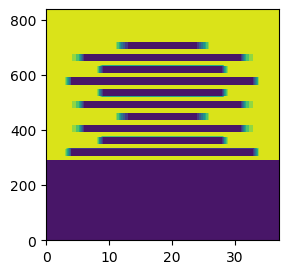

PyObject <matplotlib.contour.QuadContourSet object at 0x143c1d310>

In [6]:
figure(figsize=(3,3))
contourf(real.(ϵ_hole_layers(x, y, ps, refractive_indexes=refractive_indexes)))

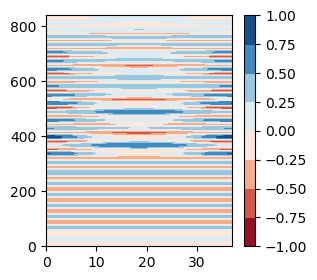

PyObject <matplotlib.colorbar.Colorbar object at 0x1452fe790>

In [7]:
figure(figsize=(3,3))
contourf(real.(Ez), cmap="RdBu")
colorbar()

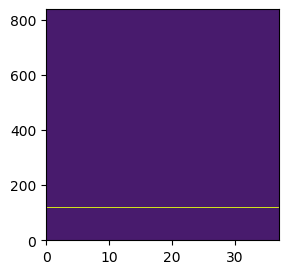

PyObject <matplotlib.contour.QuadContourSet object at 0x1453dfd10>

In [8]:
sourcegeom = zeros(size(Ez))
sourcegeom[(dpml + dsource) * resolution, :] .= 1
figure(figsize=(3,3))
contourf(sourcegeom)

### other unit cell

In [9]:
interstics = 0.0
hole = 0.15
Ly = 12
refractive_indexes = Float64[1.0, 1.0, 1.45]
ps = [0.75, 0.5, 0.66, 0.33, 0.66, 0.5, 0.75, 0.5, 0.66, 0.33]
x, y, Ez, dpml, dsource, resolution = simulation_hole_layers_unit_cell(ps, refractive_indexes=refractive_indexes, 
    frequency=1, interstice = 0., hole = hole, Ly = Ly)

(0.025:0.025:0.95, -1.975:0.025:14.0, Complex{Float64}[-3.61015e-6-1.47307e-6im -3.59711e-6-1.4926e-6im … -3.59711e-6-1.4926e-6im -3.61015e-6-1.47307e-6im; -7.91373e-6-2.81992e-6im -7.88802e-6-2.85818e-6im … -7.88802e-6-2.85818e-6im -7.91373e-6-2.81992e-6im; … ; -1.73028e-8-5.87575e-10im -1.65958e-8-1.54865e-9im … -1.65958e-8-1.54865e-9im -1.73028e-8-5.87575e-10im; -7.58164e-9+8.28773e-10im -7.22246e-9+4.02961e-10im … -7.22246e-9+4.02961e-10im -7.58164e-9+8.28773e-10im], 2, 1, 40)

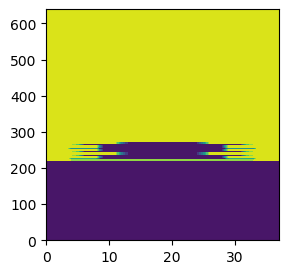

PyObject <matplotlib.contour.QuadContourSet object at 0x1455f5310>

In [10]:
figure(figsize=(3,3))
contourf(real.(ϵ_hole_layers(x, y, ps, refractive_indexes=refractive_indexes, interstice = 0., hole = hole)))

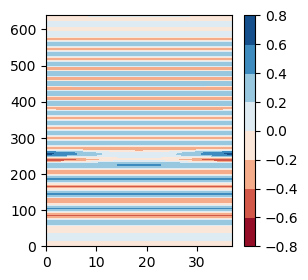

PyObject <matplotlib.colorbar.Colorbar object at 0x1443fcbd0>

In [11]:
figure(figsize=(3,3))
contourf(real.(Ez), cmap="RdBu")
colorbar()

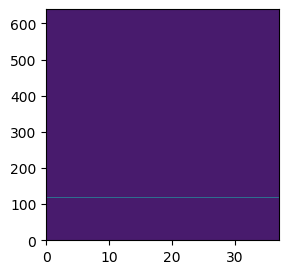

PyObject <matplotlib.contour.QuadContourSet object at 0x1446f9410>

In [12]:
sourcegeom = zeros(size(Ez))
sourcegeom[(dpml + dsource) * resolution, :] .= 1
figure(figsize=(3,3))
contourf(sourcegeom)

In [13]:
interstice = 0.0
hole = 0.05
Ly = 12
refractive_indexes = Float64[1.0, 1.0, 1.45]
ps = [0.75, 0.5, 0.66, 0.33, 0.66, 0.5, 0.75, 0.5, 0.66, 0.33]
x, y, Ez, dpml, dsource, resolution = simulation_hole_layers_unit_cell(ps, refractive_indexes=refractive_indexes, 
    frequency=1, interstice = interstice, hole = hole, Ly = Ly)

(0.025:0.025:0.95, -1.975:0.025:14.0, Complex{Float64}[-6.87479e-7-5.85275e-6im -6.87391e-7-5.75021e-6im … -6.87391e-7-5.75021e-6im -6.87479e-7-5.85275e-6im; -1.7331e-6-1.17363e-5im -1.73351e-6-1.15351e-5im … -1.73351e-6-1.15351e-5im -1.7331e-6-1.17363e-5im; … ; 9.53909e-7+3.61476e-6im 9.28581e-7+3.51565e-6im … 9.28581e-7+3.51565e-6im 9.53909e-7+3.61476e-6im; 3.31707e-7+1.7149e-6im 3.2298e-7+1.66795e-6im … 3.2298e-7+1.66795e-6im 3.31707e-7+1.7149e-6im], 2, 1, 40)

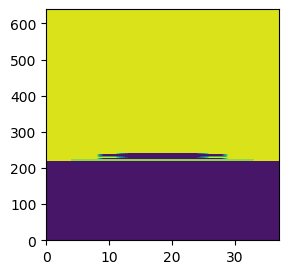

PyObject <matplotlib.contour.QuadContourSet object at 0x145173750>

In [14]:
figure(figsize=(3,3))
contourf(real.(ϵ_hole_layers(x, y, ps, refractive_indexes=refractive_indexes, interstice = interstice, hole = hole)))

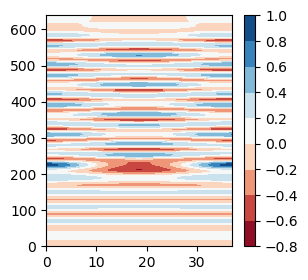

PyObject <matplotlib.colorbar.Colorbar object at 0x144f72990>

In [15]:
figure(figsize=(3,3))
contourf(real.(Ez), cmap="RdBu")
colorbar()

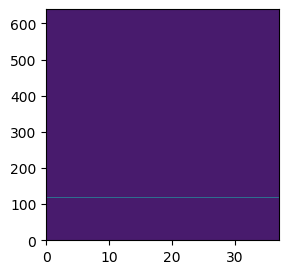

PyObject <matplotlib.contour.QuadContourSet object at 0x144fc4310>

In [16]:
sourcegeom = zeros(size(Ez))
sourcegeom[(dpml + dsource) * resolution, :] .= 1
figure(figsize=(3,3))
contourf(sourcegeom)

In [17]:
?ϵ_hole_layers

"ϵ_hole_layers" can be typed by \epsilon<tab>_hole_layers

search: ϵ_hole_layers



`ϵ_hole_layers(x, y, ps, interstice = 0.5, hole = 0.75)` return the permittivity of a unit-cell which consists of air holes in silica

Arguments:

  * ps : widths of the air holes (need to be unit-less)
  * refractive*indexes : optional argument with refractive indexes of background, hole and substrate. For reference simulation: set refractive indexes to ones(3)*eps*substrate
  * interstice (optional): number of wavelength in between holes
  * hole (optional): number of wavelength in the holes

Returns:

  * geometry : a complex array with the epsilon data of the unit-cell


In [8]:
a=ones(10)
b=ones(10)

fe = @. abs(a-b)/abs(b)

